In [82]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image

DIR_PATH = "../../data/goods-barcodes/mini_img/"


In [83]:
fnames = [fname for fname in os.listdir(DIR_PATH)]

0 0.3405 0.5632011967090501 0.549 0.13163799551234107
0 0.4205 0.4711177794448612 0.409 0.23105776444111029
0 0.4675 0.6027756939234808 0.589 0.21980495123780946


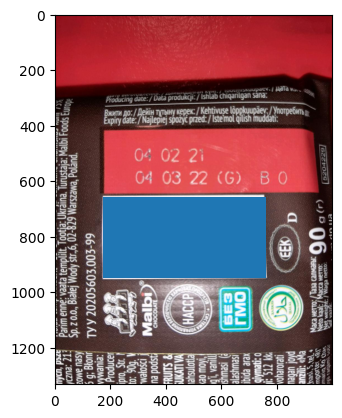

In [103]:
stop_idx = 7

for idx, fname in enumerate(fnames):
    if fname.endswith(".jpg"):
        image = Image.open(os.path.join(DIR_PATH, fname))
        name, _ = os.path.splitext(fname)
        fname_ann = f"{name}.txt"
        with open(os.path.join(DIR_PATH, fname_ann)) as fp:
            ann_str = fp.read()
        print(ann_str)
        if stop_idx <= idx:
            break

# _,x,y,w,h= [float(x) for x in ann_str.strip().split()]
# x1 = x * image.size[0]
# y1 = y * image.size[1]
# x2 = (x+w)*image.size[0]
# y2 = (y + h)*image.size[1]

_,xc,yc,w,h= [float(x) for x in ann_str.strip().split()]
# x_min = (xc - w/2) * image.size[0]
# y_min = (yc - h/2) * image.size[1]
# x_max = (xc + w/2) * image.size[0]
# y_max = (yc + h/2) * image.size[1]

x_min = (xc - w/2) * image.size[0]
y_min = (yc - h/2) * image.size[1]
x_max = (xc + w/2) * image.size[0]
y_max = (yc + h/2) * image.size[1]

bbox = [(x_min,y_min),(x_min,y_max),(x_max,y_max),(x_max,y_min)]

plt.gca().add_patch(
    Polygon(
        [
            (x_min,y_min),
            # (yc*image.size[1],xc*image.size[0]),
            (x_min,y_max),
            (x_max,y_max),
            (x_max,y_min),

            # (y_min,x_min),
            # (y_min,x_max),
            # (y_max,x_max),
            # (y_max,x_min)

            # (y1,x1),
            # (y1,x2),
            # (y2,x2),
            # (y2,x1)
        ]
    )
)

plt.imshow(image)
plt.show()
